# Importing necessary libs

In [102]:
# import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Loading the data

In [103]:
df = "./data/mem_cpu_ten.csv"

names = ['env', 'cpu_percentage',	'memory_percentage', 'memory_usage', 'net_io', 'block_io', 'pids', 'timestamp']
df = pd.read_csv(df, header=None, names=names, delimiter=';')

df.head()

,env,cpu_percentage,memory_percentage,memory_usage,net_io,block_io,pids,timestamp
0,deno,0.00%,0.37%,119.2MiB / 31.18GiB,491MB / 2.37GB,0B / 176kB,9,21:24:50
1,node,164.35%,0.26%,81.73MiB / 31.18GiB,191MB / 1.01GB,0B / 4.1kB,23,21:24:50
2,bun,0.00%,1.11%,353.3MiB / 31.18GiB,644MB / 3.53GB,0B / 0B,13,21:24:50
3,deno,0.00%,0.37%,119.2MiB / 31.18GiB,491MB / 2.37GB,0B / 176kB,9,21:24:53
4,node,128.14%,0.26%,81.75MiB / 31.18GiB,192MB / 1.02GB,0B / 4.1kB,23,21:24:53


In [104]:
float_columns = ['cpu_percentage', 'memory_percentage']

for column in float_columns:
    df[column] = df[column].str.replace('%', '')
    df[column] = df[column].astype(float)

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S')

print(df.dtypes)

df.head()


env                          object
cpu_percentage              float64
memory_percentage           float64
memory_usage                 object
net_io                       object
block_io                     object
pids                          int64
timestamp            datetime64[ns]
dtype: object


,env,cpu_percentage,memory_percentage,memory_usage,net_io,block_io,pids,timestamp
0,deno,0.00,0.37,119.2MiB / 31.18GiB,491MB / 2.37GB,0B / 176kB,9,1900-01-01 21:24:50
1,node,164.35,0.26,81.73MiB / 31.18GiB,191MB / 1.01GB,0B / 4.1kB,23,1900-01-01 21:24:50
2,bun,0.00,1.11,353.3MiB / 31.18GiB,644MB / 3.53GB,0B / 0B,13,1900-01-01 21:24:50
3,deno,0.00,0.37,119.2MiB / 31.18GiB,491MB / 2.37GB,0B / 176kB,9,1900-01-01 21:24:53
4,node,128.14,0.26,81.75MiB / 31.18GiB,192MB / 1.02GB,0B / 4.1kB,23,1900-01-01 21:24:53


In [105]:
df['time_elapsed'] = 0

filtered_df = df[df['cpu_percentage'] >= 1]

node_min = filtered_df[filtered_df['env'] == 'node']['timestamp'].min()
bun_min = filtered_df[filtered_df['env'] == 'bun']['timestamp'].min()
deno_min = filtered_df[filtered_df['env'] == 'deno']['timestamp'].min()

print("Início do teste de node:", node_min)
print("Início do teste de bun:", bun_min)
print("Início do teste de deno:", deno_min)

def determine_time_elapsed(start, timestamp):
    return (timestamp - start).seconds

filtered_df.loc[filtered_df['env'] == 'node', 'time_elapsed'] = (filtered_df['timestamp'] - node_min).dt.total_seconds()
filtered_df.loc[filtered_df['env'] == 'bun', 'time_elapsed'] = (filtered_df['timestamp'] - bun_min).dt.total_seconds()
filtered_df.loc[filtered_df['env'] == 'deno', 'time_elapsed'] = (filtered_df['timestamp'] - deno_min).dt.total_seconds()

filtered_df = filtered_df[filtered_df['time_elapsed'] >= 0]

filtered_df.head()

Início do teste de node: 1900-01-01 21:24:50
Início do teste de bun: 1900-01-01 21:30:52
Início do teste de deno: 1900-01-01 21:36:51


,env,cpu_percentage,memory_percentage,memory_usage,net_io,block_io,pids,timestamp,time_elapsed
1,node,164.35,0.26,81.73MiB / 31.18GiB,191MB / 1.01GB,0B / 4.1kB,23,1900-01-01 21:24:50,0
4,node,128.14,0.26,81.75MiB / 31.18GiB,192MB / 1.02GB,0B / 4.1kB,23,1900-01-01 21:24:53,3
7,node,133.63,0.27,85.3MiB / 31.18GiB,194MB / 1.03GB,0B / 4.1kB,23,1900-01-01 21:24:56,6
10,node,128.20,0.26,82.4MiB / 31.18GiB,195MB / 1.03GB,0B / 4.1kB,23,1900-01-01 21:24:59,9
13,node,126.00,0.25,80.81MiB / 31.18GiB,196MB / 1.04GB,0B / 4.1kB,23,1900-01-01 21:25:02,12


In [106]:
def plot_line(df: pd.DataFrame, x: str, y: str, hue: str, x_label: str, y_label: str):
    plt.figure(figsize = (14, 7))
    fig = sns.lineplot(df, x=x, y=y, hue=hue)
    for i in fig.containers:
        fig.bar_label(i,)
    fig.set(xlabel=x_label, ylabel=y_label)

# cpu usage

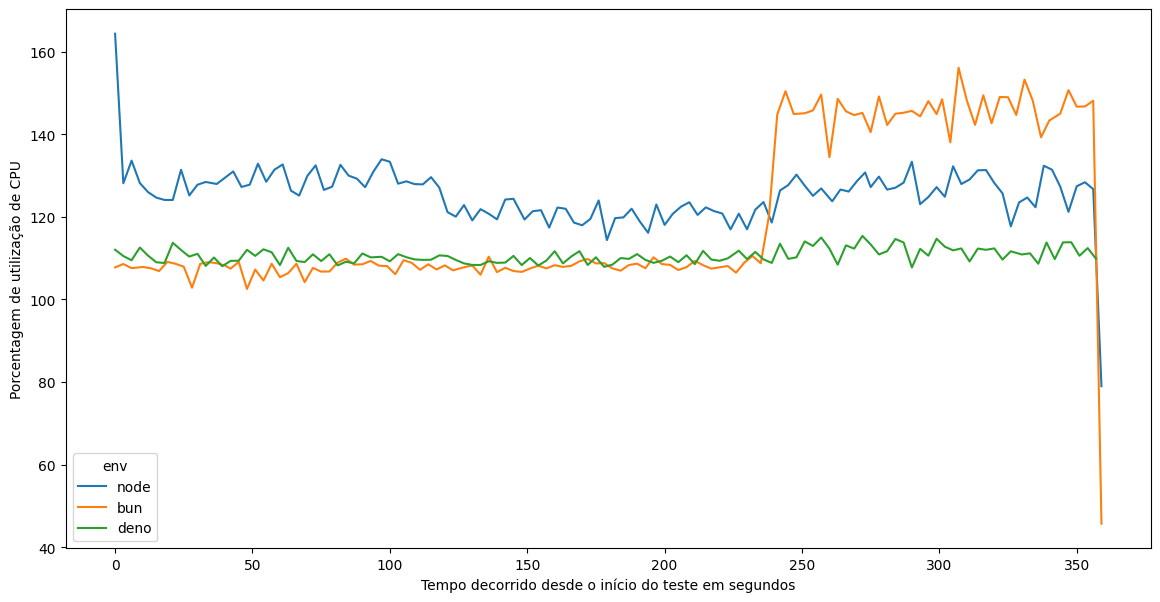

In [107]:
plot_line(filtered_df, 'time_elapsed', 'cpu_percentage', 'env', 'Tempo decorrido desde o início do teste em segundos', 'Porcentagem de utilização de CPU')

# mem usage

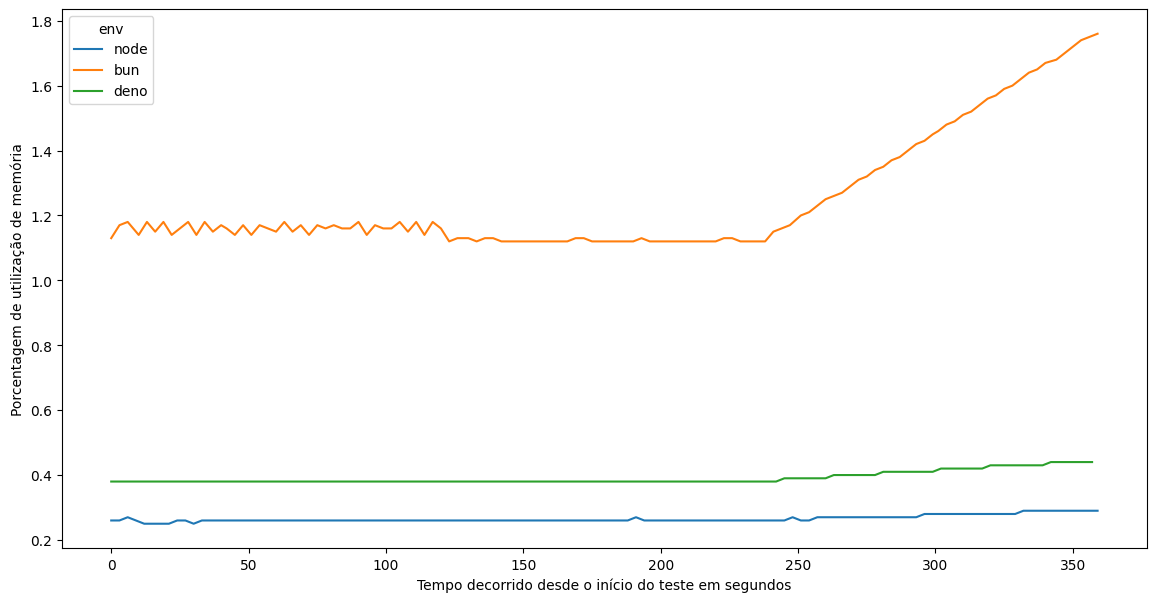

In [108]:
plot_line(filtered_df, 'time_elapsed', 'memory_percentage', 'env', 'Tempo decorrido desde o início do teste em segundos', 'Porcentagem de utilização de memória')
